In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import seaborn as sns

In [6]:
multi_r_models_djf = pd.read_csv('outputs/multi_r_models_djf.csv')
multi_r_models_mam = pd.read_csv('outputs/multi_r_models_mam.csv')
multi_r_models_jja = pd.read_csv('outputs/multi_r_models_jja.csv')
multi_r_models_son = pd.read_csv('outputs/multi_r_models_son.csv')

<Axes: >

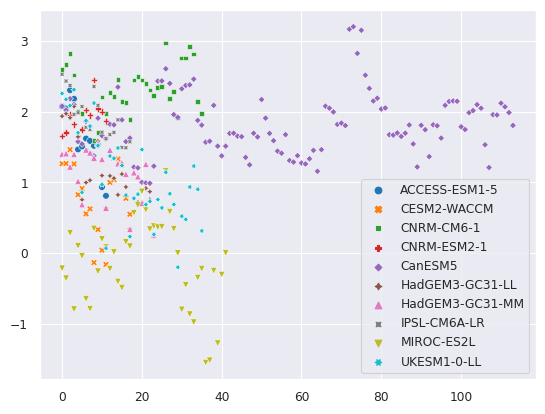

In [27]:
sns.scatterplot(multi_r_models_son)

In [67]:
marker_list = ['o', 'X', 's', 'P',\
               'D',mmarkers.MarkerStyle((4, 1, 0)),\
               '^',mmarkers.MarkerStyle((4, 1, 45)), 'v', mmarkers.MarkerStyle((8, 1, 0))]

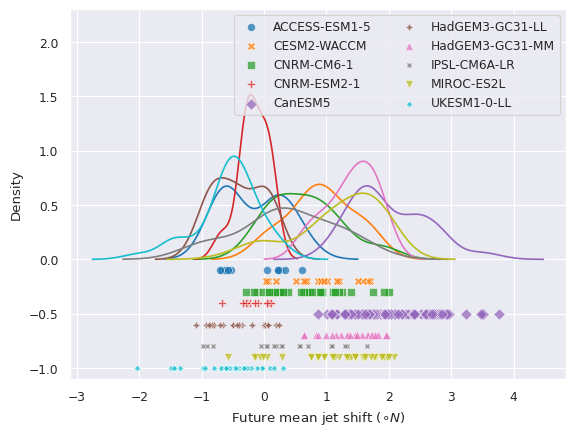

In [86]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_djf.columns:
    sns.kdeplot(multi_r_models_djf[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_djf.columns):
    sns.scatterplot(x=multi_r_models_djf[column], y=np.zeros_like(multi_r_models_djf[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_djf.png', bbox_inches='tight', dpi=200)

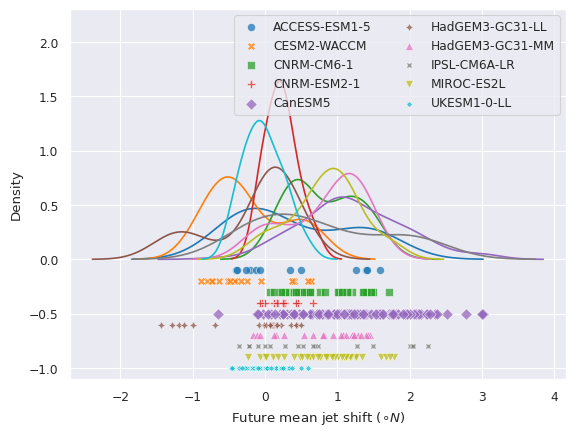

In [85]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_mam.columns:
    sns.kdeplot(multi_r_models_mam[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_mam.columns):
    sns.scatterplot(x=multi_r_models_mam[column], y=np.zeros_like(multi_r_models_mam[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_mam.png', bbox_inches='tight', dpi=200)

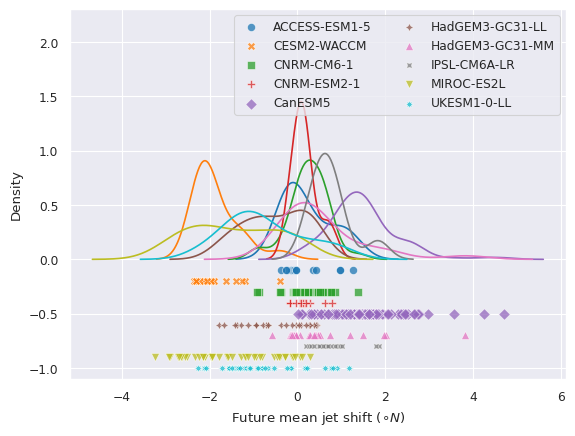

In [87]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_jja.columns:
    sns.kdeplot(multi_r_models_jja[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_jja.columns):
    sns.scatterplot(x=multi_r_models_jja[column], y=np.zeros_like(multi_r_models_jja[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_jja.png', bbox_inches='tight', dpi=200)

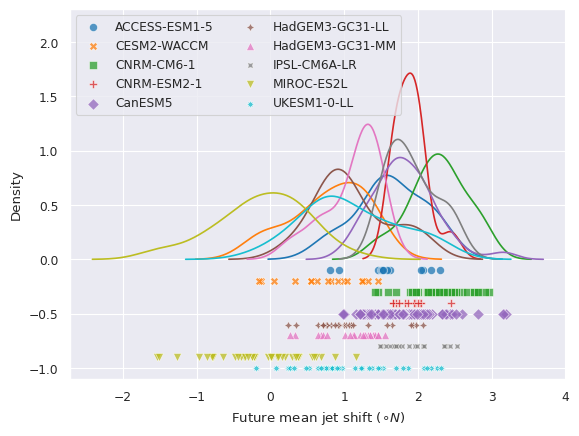

In [88]:
sns.set_context('paper')
sns.set_style('darkgrid')

fig, ax = plt.subplots(1) 
for column in multi_r_models_son.columns:
    sns.kdeplot(multi_r_models_son[column], fill=False, ax=ax)

y_offset = 0.1
for ind, column in enumerate(multi_r_models_son.columns):
    sns.scatterplot(x=multi_r_models_son[column], y=np.zeros_like(multi_r_models_son[column])-y_offset, alpha=0.75,\
                    marker=marker_list[ind], s=34, label=f'{column}', ax=ax)
    y_offset += 0.1

ax.set_ylim(-1.1, 2.3)
ax.set_xlabel("Future mean jet shift (${\circ N}$)")
plt.legend(ncols=2)
# fig.savefig(f'figures/figure_4_intramodel_son.png', bbox_inches='tight', dpi=200)